In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA PREPROCESSING

In [2]:
file_path=r"customer_data.csv"
data=pd.read_csv(file_path)

data.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [3]:
data.shape

(100000, 12)

In [4]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data.drop(columns=['id'], inplace=True)

data.head()

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [5]:
data.shape

(100000, 11)

In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

data_scaled = pd.DataFrame(data_scaled, columns=data_encoded.columns)

data_scaled.head()



,age,income,purchase_amount,promotion_usage,satisfaction_score,Cluster,gender_Male,education_College,education_HighSchool,education_Masters,...,loyalty_status_Regular,loyalty_status_Silver,purchase_frequency_occasional,purchase_frequency_rare,product_category_Books,product_category_Clothing,product_category_Electronics,product_category_Food,product_category_Health,product_category_Home
0,-0.670294,1.013004,1.794883,-0.655901,0.953443,1.124680,1.001481,-0.814355,-0.500484,-0.329915,...,-1.228273,-0.654093,-0.652877,-1.00038,2.387502,-0.499828,-0.655075,-0.417148,-0.335606,-0.231317
1,-0.223916,-0.938642,-1.058024,1.524621,0.953443,0.319693,1.001481,-0.814355,-0.500484,3.031081,...,0.814151,-0.654093,-0.652877,0.99962,-0.418848,2.000688,-0.655075,-0.417148,-0.335606,-0.231317
2,1.561594,0.871969,0.455734,-0.655901,0.953443,0.319693,1.001481,-0.814355,-0.500484,-0.329915,...,-1.228273,1.528836,-0.652877,0.99962,-0.418848,2.000688,-0.655075,-0.417148,-0.335606,-0.231317
3,-0.000728,-1.227100,-1.153663,-0.655901,1.916176,-0.485295,1.001481,-0.814355,1.998065,-0.329915,...,0.814151,-0.654093,-0.652877,-1.00038,-0.418848,-0.499828,-0.655075,2.397233,-0.335606,-0.231317
4,0.222461,1.495434,2.094092,1.524621,-0.009290,0.319693,-0.998521,1.227966,-0.500484,-0.329915,...,0.814151,-0.654093,1.531682,-1.00038,-0.418848,2.000688,-0.655075,-0.417148,-0.335606,-0.231317


KMEANS CLUSTERING

✅ Importance:
A simple and efficient clustering algorithm that assigns customers into K distinct groups based on feature similarity.

Best for large datasets and well-separated, spherical clusters.

✅ Advantages:
✔️ Fast and efficient for large datasets.
✔️ Works well with compact, spherical clusters.
✔️ Easily interpretable results.

❌ Disadvantages:
❌ Needs to specify the number of clusters (K) in advance.
❌ Not good for non-spherical clusters or datasets with noise.
❌ Sensitive to outliers and initialization.

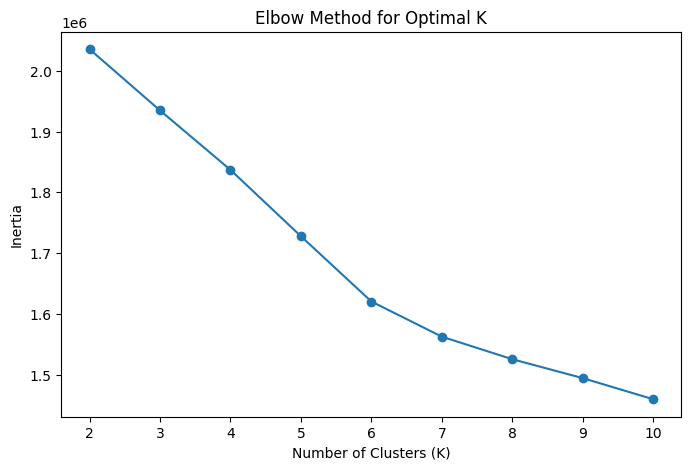

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [15]:
optimal_k = 4 
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data_scaled["Cluster"] = kmeans.fit_predict(data_scaled)

print(data_scaled["Cluster"].value_counts())

data["Cluster"] = data_scaled["Cluster"]

for cluster in range(optimal_k):
    print(f"\nCluster {cluster} Sample:")
    print(data[data["Cluster"] == cluster].head())

data.to_csv("customer_segments_k_means.csv", index=False)
print("Clustered data saved as 'customer_segments_k_means.csv'")

Cluster
1    40226
2    30027
0    14925
3    14822
Name: count, dtype: int64

Cluster 0 Sample:
    age  gender  income   education region loyalty_status purchase_frequency  \
0    27    Male   40682    Bachelor   East           Gold           frequent   
7    24  Female   47773  HighSchool  North        Regular               rare   
13   30  Female   19034    Bachelor   East        Regular         occasional   
14   28    Male   35748    Bachelor  North         Silver               rare   
44   35  Female   24758    Bachelor   East        Regular           frequent   

    purchase_amount product_category  promotion_usage  satisfaction_score  \
0             18249            Books                0                   6   
7             21794            Books                0                   5   
13             5579            Books                1                   5   
14            12901            Books                1                   3   
44            11293            Books 

DBSCAN CLUSTERING

✅ Importance:
A density-based algorithm that groups customers into clusters based on density rather than predefined cluster numbers.

It identifies noise points (outliers) that do not belong to any cluster.

✅ Advantages:
✔️ Does not require specifying K in advance.
✔️ Detects arbitrary-shaped clusters.
✔️ Effectively identifies outliers.

❌ Disadvantages:
❌ Struggles with high-dimensional data.
❌ Choosing the right epsilon (ε) value is tricky.
❌ Does not work well if the clusters have varying densities.

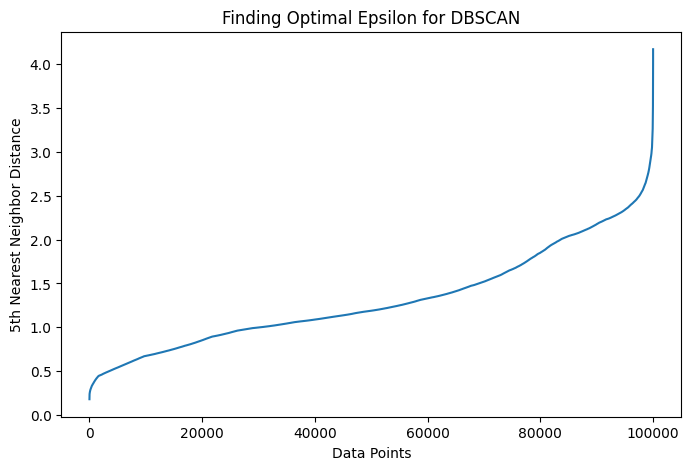

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("Finding Optimal Epsilon for DBSCAN")
plt.show()

In [10]:
eps_value = 0.5 
min_samples_value = 5 

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
data_scaled["Cluster"] = dbscan.fit_predict(data_scaled)

In [11]:
print(data_scaled["Cluster"].value_counts())

Cluster
-1      93250
 39       139
 12        95
 20        93
 66        85
        ...  
 709        3
 342        3
 550        3
 610        3
 442        3
Name: count, Length: 760, dtype: int64


In [12]:
for cluster in sorted(data["Cluster"].unique()):
    print(f"\nCluster {cluster} Sample:")
    print(data[data["Cluster"] == cluster].head())
    
data.to_csv("customer_segments_dbscan.csv", index=False)
print("Clustered data saved as 'customer_segments_dbscan.csv'")


Cluster 0 Sample:
    age  gender  income   education region loyalty_status purchase_frequency  \
5    38    Male    7347    Bachelor  South         Silver         occasional   
11   32  Female   40044    Bachelor  North         Silver               rare   
19   28    Male   40725  HighSchool   East        Regular               rare   
23   27  Female   36226     College  North        Regular           frequent   
25   22  Female    7915     College   West         Silver           frequent   

    purchase_amount product_category  promotion_usage  satisfaction_score  \
5              2822      Electronics                0                   5   
11            13608      Electronics                0                   5   
19            12764      Electronics                1                   6   
23            12633      Electronics                1                   4   
25             2188      Electronics                0                   6   

    Cluster  
5         0  
11       

GAUSSIAN MIXTURE MODEL(GMM)

✅ Importance:
A probabilistic clustering approach that models data as a mixture of multiple Gaussian distributions.

Assigns soft probabilities instead of hard cluster assignments.

✅ Advantages:
✔️ Works well with overlapping clusters.
✔️ Does not assume clusters are spherical (like K-Means).
✔️ Provides probabilistic assignments (i.e., how likely a customer belongs to a cluster).

❌ Disadvantages:
❌ Computationally expensive for large datasets.
❌ Assumes data follows a Gaussian distribution, which may not always be true.
❌ Needs careful tuning of cluster numbers using BIC or AIC scores.

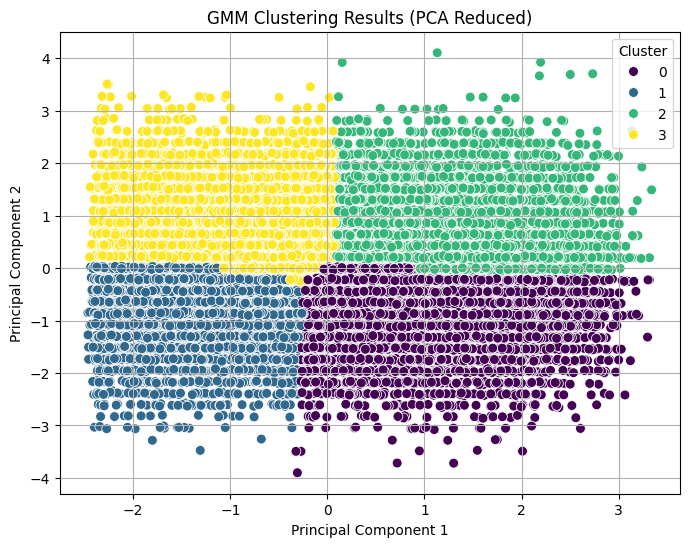

'customers_segments_gmm.csv'

In [17]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['age', 'income', 'purchase_amount', 'satisfaction_score']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

np.random.seed(42) 
sample_indices = np.random.choice(X_scaled.shape[0], int(0.3 * X_scaled.shape[0]), replace=False)
X_sampled = X_scaled[sample_indices]

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_sampled)

gmm = GaussianMixture(n_components=4, covariance_type='diag', init_params='kmeans', random_state=42)
cluster_labels = gmm.fit_predict(X_reduced)

results_df = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
results_df['Cluster'] = cluster_labels

results_csv_path = "customers_segments_gmm.csv"
results_df.to_csv(results_csv_path, index=False)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=results_df['PC1'], y=results_df['PC2'], hue=results_df['Cluster'], palette='viridis', s=50)
plt.title("GMM Clustering Results (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

results_csv_path


**## Clustering Analysis: K-Means, DBSCAN, and GMM**

### **1. Why We Chose Each Clustering Method?**

#### **K-Means Clustering**
- **Reason for Choice:**
  - It is a simple and efficient clustering algorithm.
  - Works well when clusters are spherical and well-separated.
  - Scales well with large datasets.
- **Limitations:**
  - Assumes clusters are convex and of similar sizes.
  - Sensitive to outliers and requires predefining the number of clusters (K).

#### **DBSCAN (Density-Based Clustering)**
- **Reason for Choice:**
  - Can find arbitrarily shaped clusters.
  - Does not require the number of clusters to be predefined.
  - Handles noise and outliers well.
- **Limitations:**
  - Performance can be affected by the choice of parameters (eps and min_samples).
  - Struggles with clusters of varying density.
  
#### **Gaussian Mixture Model (GMM)**
- **Reason for Choice:**
  - A probabilistic model that assigns cluster memberships based on likelihood.
  - Can model clusters with different shapes, sizes, and orientations.
  - Provides soft clustering, meaning each data point has a probability of belonging to multiple clusters.
- **Limitations:**
  - Computationally expensive (slower than K-Means and DBSCAN).
  - Requires tuning of the number of components (clusters) and assumes Gaussian distributions.

---

### **2. Analysis of Results**

#### **K-Means Performance:**
- Successfully grouped customers into distinct segments.
- Some misclassifications due to the algorithm's assumption of spherical clusters.
- Struggled with noisy data and non-convex cluster shapes.

#### **DBSCAN Performance:**
- Successfully detected clusters of different shapes and sizes.
- Identified outliers as noise, which helps in anomaly detection.
- Performed poorly on clusters with varying densities, sometimes merging smaller clusters into one.

#### **GMM Performance:**
- Provided a more flexible clustering approach by modeling data with Gaussian distributions.
- Produced soft clustering results, allowing for uncertainty in cluster assignments.
- Slower than K-Means due to probabilistic calculations but better at capturing complex cluster shapes.

---

### **3. Conclusion: What We Understand from the Results?**
- **If the data contains well-separated, compact clusters:** K-Means is the best choice due to its speed and efficiency.
- **If the data has irregularly shaped clusters and contains noise:** DBSCAN performs better as it can detect arbitrary shapes and remove outliers.
- **If the data has overlapping clusters and requires probabilistic classification:** GMM is the best as it models data distributions effectively.

**Final Recommendation:**
- **Use K-Means when speed and scalability matter.**
- **Use DBSCAN for outlier detection and non-convex cluster shapes.**
- **Use GMM when a probabilistic approach is needed, though it is slower.**

Would you like further optimizations or visualizations? 🚀

